In [173]:
import os, pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

In [137]:
df=pd.read_csv('drugs.csv')
display(df.head()); df.shape, df.columns.tolist()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


((200, 6), ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'])

In [139]:
#Transformacion de datos
cat_cols=['Sex','BP','Cholesterol']
encoders={c:LabelEncoder().fit(df[c]) for c in cat_cols}
for c,e in encoders.items(): df[c+'_enc']=e.transform(df[c])
feature_cols=['Age','Na_to_K']+[c+'_enc' for c in cat_cols]
X=df[feature_cols].values; y=df['Drug'].values
le = LabelEncoder()
y_train_enc = le.fit_transform(y)
y = y_train_enc
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42,stratify=y)

In [141]:
#Modelado SAG
model = LogisticRegression(solver="sag")
clf=model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Solucionador: SAG')
print("\nIntercepto (beta 0):", clf.intercept_)
print("\nPesos de cada variable(otras betas 1-7)", clf.coef_)
score = model.score(X_test, y_test)
print('\n\nScore de precision: ', score)
print('\n\n',classification_report(y_test,y_pred))
print('-----------------------------------------------\n\n\n')

Solucionador: SAG

Intercepto (beta 0): [ 0.21309353 -0.07752104  0.06860153  0.29071764 -0.49489165]

Pesos de cada variable(otras betas 1-7) [[-0.02540238  0.10092236  0.15662486 -0.63625877  0.14284323]
 [ 0.06001797 -0.2353252  -0.08942396 -0.59324977 -0.08490597]
 [ 0.01938572 -0.10051695  0.04192994  0.11305769 -0.30647399]
 [ 0.00364095 -0.0960853   0.06851711  1.25146253  0.46279476]
 [-0.05764225  0.3310051  -0.17764796 -0.13501169 -0.21425803]]


Score de precision:  0.74


               precision    recall  f1-score   support

           0       0.50      0.17      0.25         6
           1       0.67      0.50      0.57         4
           2       0.00      0.00      0.00         4
           3       0.85      0.85      0.85        13
           4       0.72      1.00      0.84        23

    accuracy                           0.74        50
   macro avg       0.55      0.50      0.50        50
weighted avg       0.66      0.74      0.68        50

---------------------

C:\Users\alfre\Anaconda2\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\alfre\Anaconda2\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\alfre\Anaconda2\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\alfre\Anaconda2\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted 

In [143]:
model = LogisticRegression(solver="saga")
clf=model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Solucionador: SAG')
print("\nIntercepto (beta 0):", clf.intercept_)
print("\nPesos de cada variable(otras betas 1-7)", clf.coef_)
score = model.score(X_test, y_test)
print('\n\nScore de precision: ', score)
print('\n\n',classification_report(y_test,y_pred))
print('-----------------------------------------------\n\n\n')

Solucionador: SAG

Intercepto (beta 0): [ 0.10923995 -0.04978146  0.02862114  0.17779004 -0.26586966]

Pesos de cada variable(otras betas 1-7) [[-0.02342035  0.08856647  0.08605143 -0.37983297  0.0796587 ]
 [ 0.05559957 -0.23675925 -0.04631432 -0.36368727 -0.04949422]
 [ 0.01807307 -0.09888917  0.02161633  0.04395059 -0.16806587]
 [ 0.00701876 -0.05711435  0.05326259  0.82678335  0.26726527]
 [-0.05727105  0.3041963  -0.11461603 -0.1272137  -0.12936388]]


Score de precision:  0.7


               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.67      0.50      0.57         4
           2       0.00      0.00      0.00         4
           3       0.73      0.85      0.79        13
           4       0.69      0.96      0.80        23

    accuracy                           0.70        50
   macro avg       0.42      0.46      0.43        50
weighted avg       0.56      0.70      0.62        50

----------------------

C:\Users\alfre\Anaconda2\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\alfre\Anaconda2\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\alfre\Anaconda2\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\alfre\Anaconda2\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted 

In [145]:
model = LogisticRegression(solver="liblinear")
clf=model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Solucionador: Liblinear')
print("\nIntercepto (beta 0):", clf.intercept_)
print("\nPesos de cada variable(otras betas 1-7)", clf.coef_)
score = model.score(X_test, y_test)
print('\n\nScore de precision: ', score)
print('\n\n',classification_report(y_test,y_pred))
print('-----------------------------------------------\n\n\n')

Solucionador: Liblinear

Intercepto (beta 0): [ 2.04442193 -0.64287     0.58834441  0.76549993 -4.31162547]

Pesos de cada variable(otras betas 1-7) [[-0.02852438 -0.15879866  0.59422626 -2.28103361  0.08569116]
 [ 0.09161245 -0.36803649 -0.65959375 -2.48974065 -0.55152402]
 [ 0.01215219 -0.23677334  0.10337738 -0.04958796 -1.87865261]
 [ 0.00354678 -0.46373135 -0.37088324  2.83310547  1.92485874]
 [-0.04691272  0.46611121 -0.27028965 -0.24273631 -0.50505551]]


Score de precision:  0.86


               precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.75      0.75      0.75         4
           2       0.00      0.00      0.00         4
           3       0.87      1.00      0.93        13
           4       0.88      1.00      0.94        23

    accuracy                           0.86        50
   macro avg       0.66      0.68      0.67        50
weighted avg       0.79      0.86      0.82        50

---------------

C:\Users\alfre\Anaconda2\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\alfre\Anaconda2\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\alfre\Anaconda2\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [147]:
model = LogisticRegression(solver="lbfgs")
clf=model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Solucionador: lbfgs')
print("\nIntercepto (beta 0):", clf.intercept_)
print("\nPesos de cada variable(otras betas 1-7)", clf.coef_)
score = model.score(X_test, y_test)
print('\n\nScore de precision: ', score)
print('\n\n',classification_report(y_test,y_pred))
print('-----------------------------------------------\n\n\n')

Solucionador: lbfgs

Intercepto (beta 0): [ 1.1718359  -0.35263596  0.55150204  1.12801299 -2.49871497]

Pesos de cada variable(otras betas 1-7) [[-0.03330792  0.11904641  0.53585747 -2.31239307  0.28290173]
 [ 0.08987056 -0.2394338  -0.44813556 -2.14238921 -0.50075532]
 [ 0.01575781 -0.10044821  0.26025371  0.78569216 -1.34614834]
 [-0.01772891 -0.26830087 -0.12045891  3.22573214  2.0551941 ]
 [-0.05459154  0.48913647 -0.22751671  0.44335797 -0.49119217]]


Score de precision:  0.84


C:\Users\alfre\Anaconda2\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(




               precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.67      0.50      0.57         4
           2       1.00      0.25      0.40         4
           3       0.93      1.00      0.96        13
           4       0.88      0.96      0.92        23

    accuracy                           0.84        50
   macro avg       0.81      0.67      0.69        50
weighted avg       0.85      0.84      0.82        50

-----------------------------------------------





In [149]:
model = LogisticRegression(solver="newton-cg")
clf=model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Solucionador: newton-cg')
print("\nIntercepto (beta 0):", clf.intercept_)
print("\nPesos de cada variable(otras betas 1-7)", clf.coef_)
score = model.score(X_test, y_test)
print('\n\nScore de precision: ', score)
print('\n\n',classification_report(y_test,y_pred))
print('-----------------------------------------------\n\n\n')

Solucionador: newton-cg

Intercepto (beta 0): [ 13.17319676  -0.21974634   9.9764876    6.00370178 -28.93363981]

Pesos de cada variable(otras betas 1-7) [[-0.08929762 -0.56967399  0.33706144 -2.15432179 -0.09845913]
 [ 0.12613516 -0.35260553 -0.42540839 -1.80759505 -0.30675513]
 [-0.00791243 -0.67411457  0.01157537  0.56229057 -1.49468462]
 [-0.01054161 -0.54736687 -0.25684334  2.92123584  1.76697371]
 [-0.01838346  2.14376097  0.33361493  0.47839043  0.13292516]]


Score de precision:  0.94


               precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.75      0.86         4
           2       1.00      0.50      0.67         4
           3       1.00      1.00      1.00        13
           4       0.96      1.00      0.98        23

    accuracy                           0.94        50
   macro avg       0.94      0.85      0.87        50
weighted avg       0.95      0.94      0.93        50

----------

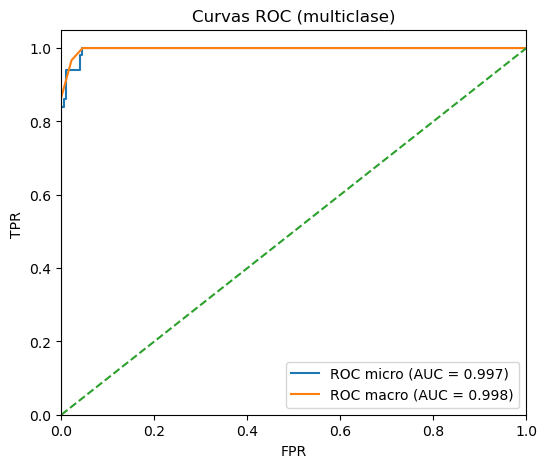

In [177]:
y_score = clf.predict_proba(X_test)

# Clases presentes (según el train)
classes_ = np.unique(y_train)

plt.figure(figsize=(6,5))

if len(classes_) == 2:
    # Caso binario: usar la prob. de la clase positiva (índice 1)
    fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
    plt.xlabel("FPR (1 - Especificidad)"); plt.ylabel("TPR (Sensibilidad)")
    plt.title("Curva ROC (binaria)")
    plt.legend(loc="lower right")
    plt.show()

else:
    # Caso multiclase: binarizar y calcular micro/macro
    y_test_bin = label_binarize(y_test, classes=classes_)

    # ROC por clase
    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(len(classes_)):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Micro-average
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Macro-average (promedio de curvas por clase)
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes_))]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(len(classes_)):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= len(classes_)
    fpr["macro"], tpr["macro"] = all_fpr, mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Graficar micro y macro (puedes añadir por clase si lo deseas)
    plt.plot(fpr["micro"], tpr["micro"], label=f"ROC micro (AUC = {roc_auc['micro']:.3f})")
    plt.plot(fpr["macro"], tpr["macro"], label=f"ROC macro (AUC = {roc_auc['macro']:.3f})")
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
    plt.xlabel("FPR"); plt.ylabel("TPR ")
    plt.title("Curvas ROC (multiclase)")
    plt.legend(loc="lower right")
    plt.show()